In [22]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [23]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

In [24]:
# Standardize features 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

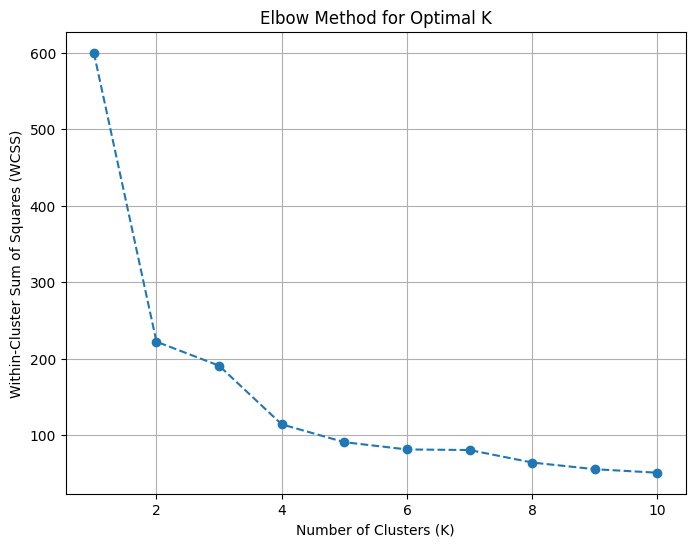

In [25]:
# Calculate within-cluster sum of squares (WCSS) for different K values
wcss = []
for k in range(1, 11):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X_scaled)
    wcss.append(model.inertia_)  # Inertia is the WCSS value

# Plot the Elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()

In [26]:
# Apply K-means clustering
model = KMeans(n_clusters=4, random_state=42)
model.fit(X_scaled)

# Get cluster assignments and centroids
cluster_labels = model.labels_
centroids = model.cluster_centers_

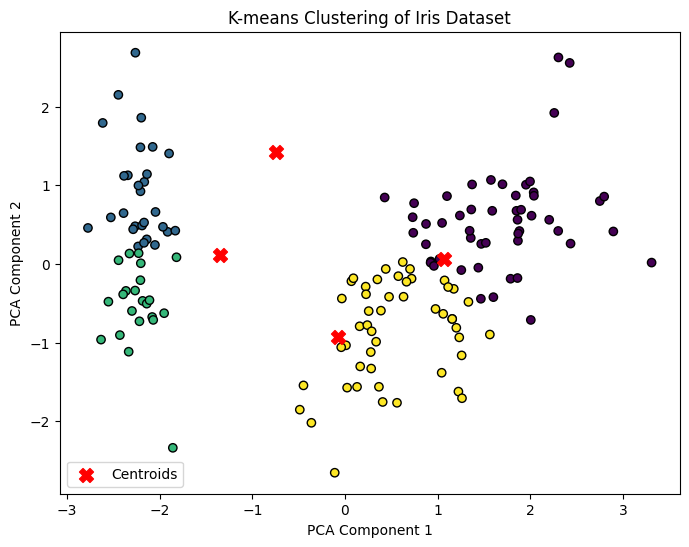

In [27]:
# Visualize the clusters (using PCA for 2D visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', edgecolor='k')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=100, label='Centroids')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-means Clustering of Iris Dataset')
plt.legend()
plt.show()